<a href="https://colab.research.google.com/github/TheoKoess/Financement/blob/florian-gaborieau/Projet_Moreau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet Colab "ProFound" sur le sujet de financement réalisé par notre groupe

In [47]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', False)
import os                       # files handling
import matplotlib.pyplot as plt # plotting & dataviz
import re
from random import randint, seed
from IPython.display import display
import seaborn as sns

%matplotlib inline

In [30]:
# importer le jeu de données depuis mon drive
financement_df = pd.read_csv("/content/drive/MyDrive/financement.csv", sep=",", index_col=0)

In [31]:
def resumetable(df):
  print("Format de la base : {}".format(df.shape))
  summary = pd.DataFrame(df.dtypes, columns=["dtypes"]).reset_index() # Initialisation
  summary['Name'] = summary["index"]
  summary = summary[["Name", "dtypes"]]
  summary["Missing"] = df.isnull().sum().values
  summary["Miss percent"] = round((summary["Missing"]*100)/df.shape[0],0)
  summary["Uniques"] = df.nunique().values
  summary["First Value"] = df.iloc[0].values
  summary["Second Value"] = df.iloc[1].values
  summary["Third Value"] = df.iloc[2].values
  return summary

In [32]:
resumetable(financement_df)

Format de la base : (378661, 15)


,Name,dtypes,Missing,Miss percent,Uniques,First Value,Second Value,Third Value
0,ID,int64,0,0.0,378661,1000002330,1000003930,1000004038
1,nom,object,4,0.0,375764,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?
2,categorie,object,0,0.0,159,Poetry,Narrative Film,Narrative Film
3,categorie_principale,object,0,0.0,15,Publishing,Film & Video,Film & Video
4,monaie,object,0,0.0,14,GBP,USD,USD
5,date_butoire,object,0,0.0,3164,2015-10-09,2017-11-01,2013-02-26
6,objectif,float64,0,0.0,8353,1000.0,30000.0,45000.0
7,lancement,object,0,0.0,378089,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50
8,promesse,float64,0,0.0,62130,0.0,2421.0,220.0
9,etat,object,0,0.0,6,failed,failed,failed


In [33]:
financement_df = financement_df.dropna()

In [34]:
resumetable(financement_df)

Format de la base : (374860, 15)


,Name,dtypes,Missing,Miss percent,Uniques,First Value,Second Value,Third Value
0,ID,int64,0,0.0,374860,1000002330,1000003930,1000004038
1,nom,object,0,0.0,372068,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?
2,categorie,object,0,0.0,159,Poetry,Narrative Film,Narrative Film
3,categorie_principale,object,0,0.0,15,Publishing,Film & Video,Film & Video
4,monaie,object,0,0.0,14,GBP,USD,USD
5,date_butoire,object,0,0.0,3164,2015-10-09,2017-11-01,2013-02-26
6,objectif,float64,0,0.0,8312,1000.0,30000.0,45000.0
7,lancement,object,0,0.0,374298,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50
8,promesse,float64,0,0.0,61936,0.0,2421.0,220.0
9,etat,object,0,0.0,5,failed,failed,failed


# Préparation des données

Séparation des variables de type date 'lancement' et 'date_butoire' en jour mois année ajout d'une nouvelle variable 'écart_date' qui calcule l'écart en jours entre 'lancement' et 'date_butoire'

In [35]:
# Conversion de la variable 'lancement' en type datetime puis on garde juste la date
financement_df["lancement"] = pd.to_datetime(financement_df["lancement"])

# Conversion de la variable 'date_butoire' en date
financement_df["date_butoire"] = pd.to_datetime(financement_df["date_butoire"])

In [36]:
financement_df["day_lancement"] = financement_df["lancement"].dt.day.astype(int)
financement_df["month_lancement"] = financement_df["lancement"].dt.month.astype(int)
financement_df["year_lancement"] = financement_df["lancement"].dt.year.astype(int)

financement_df["day_date_butoire"] = financement_df["date_butoire"].dt.day.astype(int)
financement_df["month_date_butoire"] = financement_df["date_butoire"].dt.month.astype(int)
financement_df["year_date_butoire"] = financement_df["date_butoire"].dt.year.astype(int)

financement_df['ecart'] = (financement_df['date_butoire'] - financement_df['lancement']) / np.timedelta64(1, 'D')

In [ ]:
resumetable(financement_df)

# Feature Engineering

In [ ]:
financement_df['etat'] = financement_df['etat'].replace("successful",1)
financement_df['etat'] = financement_df['etat'].replace("live",1)
financement_df['etat'] = financement_df['etat'].replace("failed",0)
financement_df['etat'] = financement_df['etat'].replace("canceled",0)
financement_df['etat'] = financement_df['etat'].replace("suspended",0)
financement_df['etat'] = financement_df['etat'].astype(int)
financement_df

In [66]:
palette=["#BE904E", "#123859", "#D3B26C", "#295073", "#E8D388", "#99ADBF", "#F9EEA0"]

In [ ]:
financement_df3 = financement_df[financement_df['ecart'] < 3000]

financement_df_year = financement_df.groupby(by = 'year_lancement', as_index = False).sum()
financement_df_month = financement_df.groupby(by = 'month_lancement', as_index = False).mean()
financement_df_day = financement_df.groupby(by = 'day_lancement', as_index = False).mean()

In [ ]:
# Spécifiez les deux couleurs à utiliser
start_color = "#123859" # bleu
end_color = "#F9EEA0" # jaune

# Créer une palette de couleurs linéaire entre les deux couleurs de départ et d'arrivée
cmap = sns.light_palette((start_color, end_color), as_cmap=True)

# Afficher le dégradé de couleurs en utilisant une barre de couleurs
sns.palplot(sns.color_palette(cmap))
plt.show()

<ipython-input-72-2aa8f8d1a3fc>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = financement_df3, x='ecart', kde=True, stat="percent", ax=axes[1, 1], bins = 25, palette= palette)


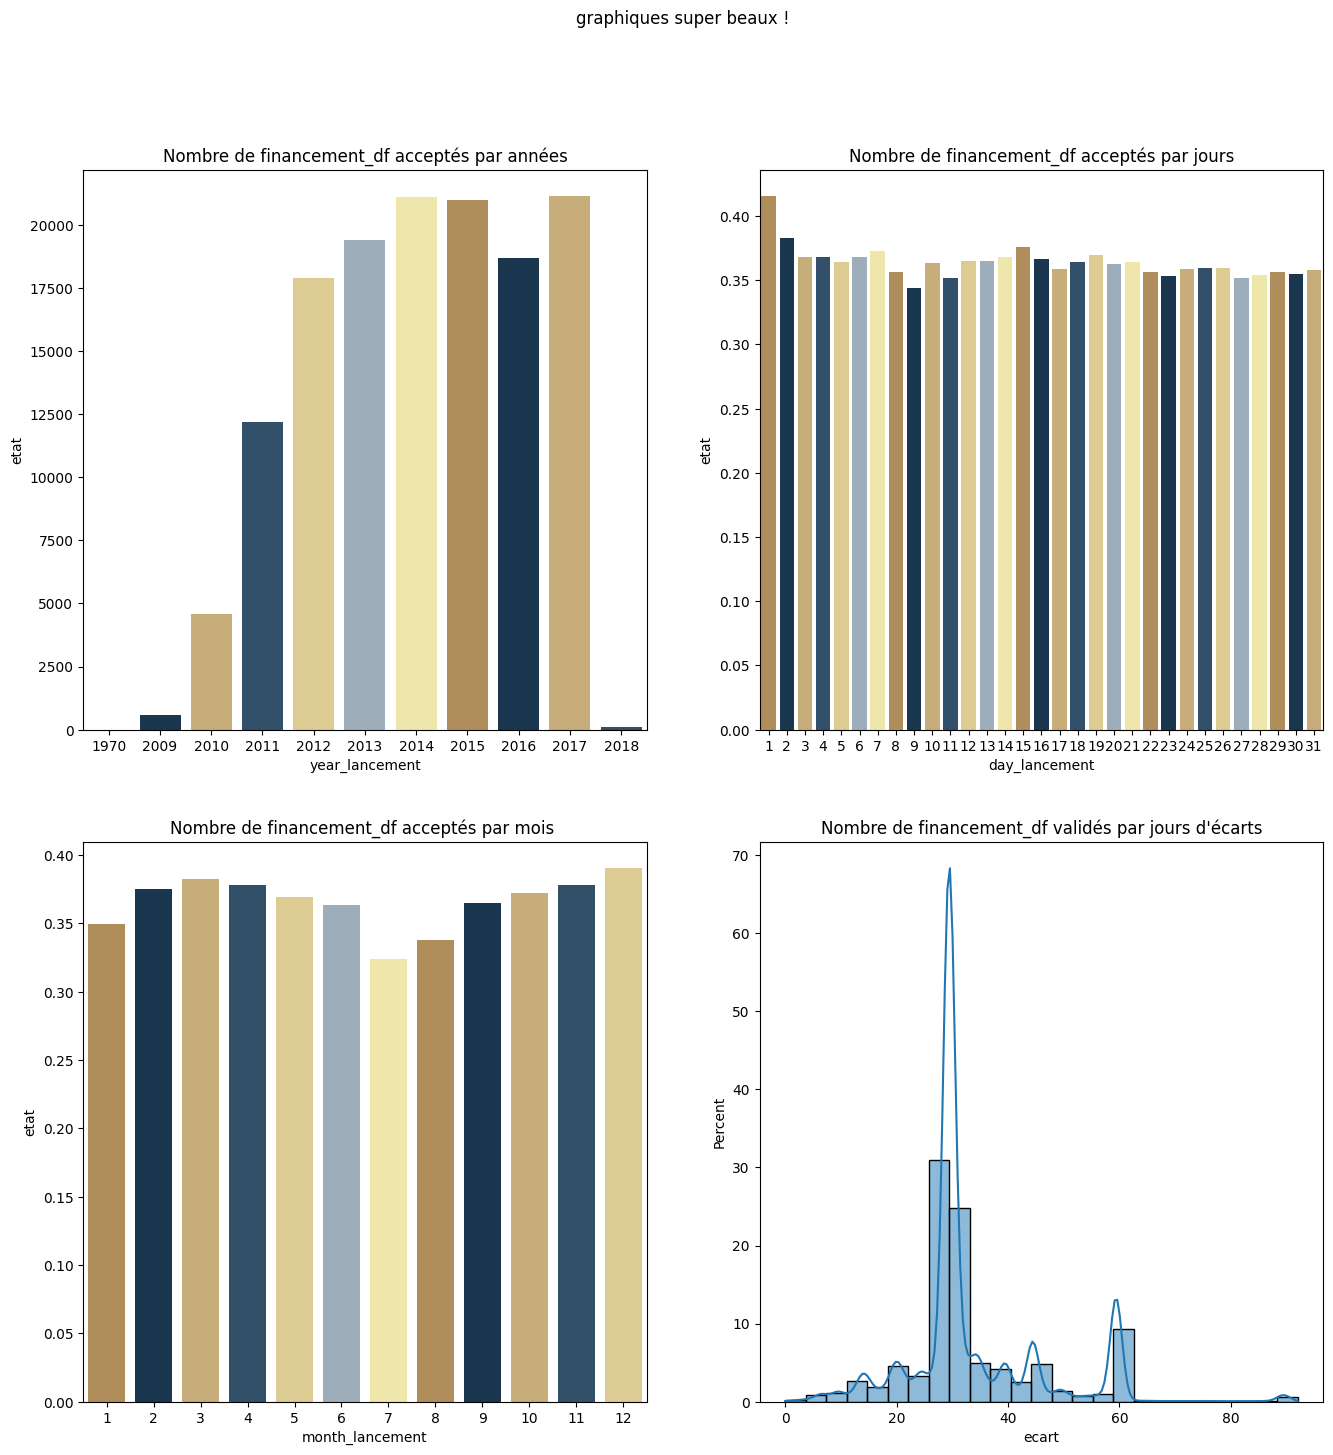

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(16,16))
fig.suptitle('graphiques super beaux !')

# graph 1
sns.barplot(data = financement_df_year, y = 'etat', x = 'year_lancement', ax=axes[0,0], palette= palette)
axes[0,0].set_title('Nombre de financement_df acceptés par années')

# graph 2
sns.barplot(data = financement_df_month, y = 'etat', x='month_lancement', ax=axes[1,0], palette= palette)
axes[1, 0].set_title('Nombre de financement_df acceptés par mois ')

# graph 3
sns.barplot(data = financement_df_day, y = 'etat', x='day_lancement', ax=axes[0,1], palette= palette)
axes[0, 1].set_title('Nombre de financement_df acceptés par jours')

# graph 4
sns.histplot(data = financement_df3, x='ecart', kde=True, stat="percent", ax=axes[1, 1], bins = 25, palette= palette)
axes[1, 1].set_title("Nombre de financement_df validés par jours d'écarts");

In [73]:
financement_df['ecart'].sort_values(ascending=False)

319002    16738.958333
2842      14866.958333
48147     14834.958333
94579     14760.958333
75397     14749.958333
              ...     
370904        0.093831
65731         0.075463
182763        0.071493
180186        0.035498
156430        0.005058
Name: ecart, Length: 374860, dtype: float64

On cherche à prédire la variable Etat.
Pour commencer, créer un dataframe contenant les variables quantitatives. On va faire des dummies de variables "categorie", "categorie_principale", "monnaie" et "pays"

In [77]:
financement_df.dtypes

ID                               int64
nom                             object
categorie                       object
categorie_principale            object
monaie                          object
date_butoire            datetime64[ns]
objectif                       float64
lancement               datetime64[ns]
promesse                       float64
etat                             int64
supporters                       int64
pays                            object
promesse_usd1                  float64
promesse_usd2                  float64
objectif_usd                   float64
day_lancement                    int64
month_lancement                  int64
year_lancement                   int64
day_date_butoire                 int64
month_date_butoire               int64
year_date_butoire                int64
ecart                          float64
dtype: object

In [89]:
financement_df_dum = pd.get_dummies(financement_df, columns=['categorie', 'categorie_principale', 'monaie', 'pays'])
financement_df_quant = financement_df[["objectif_usd", "supporters", "day_lancement", "month_lancement", "year_lancement", "day_date_butoire", "month_date_butoire", "year_date_butoire", "ecart"]]

col_financement_df = list(financement_df.columns)
remove_col = ['categorie', 'categorie_principale', 'monaie', 'pays']
list_col_to_remove = [x for x in col_financement_df if x not in remove_col]
financement_df_dum = financement_df_dum.drop(list_col_to_remove, axis= 1)

data = pd.concat([financement_df_dum, financement_df_quant], axis = 1)

In [92]:
data

,categorie_3D Printing,categorie_Academic,categorie_Accessories,categorie_Action,categorie_Animals,categorie_Animation,categorie_Anthologies,categorie_Apparel,categorie_Apps,categorie_Architecture,categorie_Art,categorie_Art Books,categorie_Audio,categorie_Bacon,categorie_Blues,categorie_Calendars,categorie_Camera Equipment,categorie_Candles,categorie_Ceramics,categorie_Children's Books,categorie_Childrenswear,categorie_Chiptune,categorie_Civic Design,categorie_Classical Music,categorie_Comedy,categorie_Comic Books,categorie_Comics,categorie_Community Gardens,categorie_Conceptual Art,categorie_Cookbooks,categorie_Country & Folk,categorie_Couture,categorie_Crafts,categorie_Crochet,categorie_DIY,categorie_DIY Electronics,categorie_Dance,categorie_Design,categorie_Digital Art,categorie_Documentary,...,monaie_GBP,monaie_HKD,monaie_JPY,monaie_MXN,monaie_NOK,monaie_NZD,monaie_SEK,monaie_SGD,monaie_USD,pays_AT,pays_AU,pays_BE,pays_CA,pays_CH,pays_DE,pays_DK,pays_ES,pays_FR,pays_GB,pays_HK,pays_IE,pays_IT,pays_JP,pays_LU,pays_MX,pays_NL,pays_NO,pays_NZ,pays_SE,pays_SG,pays_US,objectif_usd,supporters,day_lancement,month_lancement,year_lancement,day_date_butoire,month_date_butoire,year_date_butoire,ecart
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1533.95,0,11,8,2015,9,10,2015,58.491343
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30000.00,15,2,9,2017,1,11,2017,59.802813
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45000.00,3,12,1,2013,26,2,2013,44.985532
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5000.00,1,17,3,2012,16,4,2012,29.858206
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19500.00,14,4,7,2015,29,8,2015,55.642326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50000.00,1,17,9,2014,17,10,2014,29.892014
378657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1500.00,5,22,6,2011,19,7,2011,26.850532
378658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15000.00,1,1,7,2010,16,8,2010,45.180208
378659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15000.00,6,13,1,2016,13,2,2016,30.240359


In [93]:
from sklearn.model_selection import train_test_split
target = financement_df['etat']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Filtration

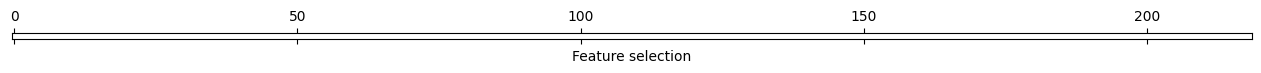

In [94]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=1e-6)
sel.fit(X_train)

mask = sel.get_support()

plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection')
plt.yticks([]);